# Практическая работа №6. Метод K-ближайших соседей

# Базовый алгоритм KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import accuracy_score

data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=10)
X_train.shape, X_test.shape

((140, 4), (10, 4))

#### 1.2. Обучите модель KNN

In [3]:
# Импортируем класс KNeighborsClassifier из модуля sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Устанавливаем количество соседей для алгоритма kNN
n_neighbors = 3

# Создаем экземпляр классификатора KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

#### 1.3. Проверьте качество работы модели

In [4]:
pred_test = model.predict(X_test)
pred_test


array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1])

In [5]:
train_values = model.predict(X_train) # для последних глав

In [6]:
display(pred_test, y_test)
accuracy_score(pred_test, y_test)

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1])

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1])

0.9

Неудачно(

#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

In [7]:
n_neighbors = 7

# Создаем экземпляр классификатора KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=n_neighbors)
model2.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [8]:
pred_test = model2.predict(X_test)
pred_test

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1])

In [9]:
display(pred_test, y_test)
accuracy_score(pred_test, y_test)

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1])

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1])

0.9

In [10]:
n_neighbors = 10

# Создаем экземпляр классификатора KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=n_neighbors)
model3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [11]:
pred_test = model3.predict(X_test)
pred_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1])

In [12]:
display(pred_test, y_test)
accuracy_score(pred_test, y_test)

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1])

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1])

1.0

In [13]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
66,5.6,3.0,4.5,1.5
142,5.8,2.7,5.1,1.9
53,5.5,2.3,4.0,1.3
1,4.9,3.0,1.4,0.2
19,5.1,3.8,1.5,0.3
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [14]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
72,6.3,2.5,4.9,1.5
67,5.8,2.7,4.1,1.0
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3


C:\Users\Nick\AppData\Local\Temp\ipykernel_16472\1101913660.py:12: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


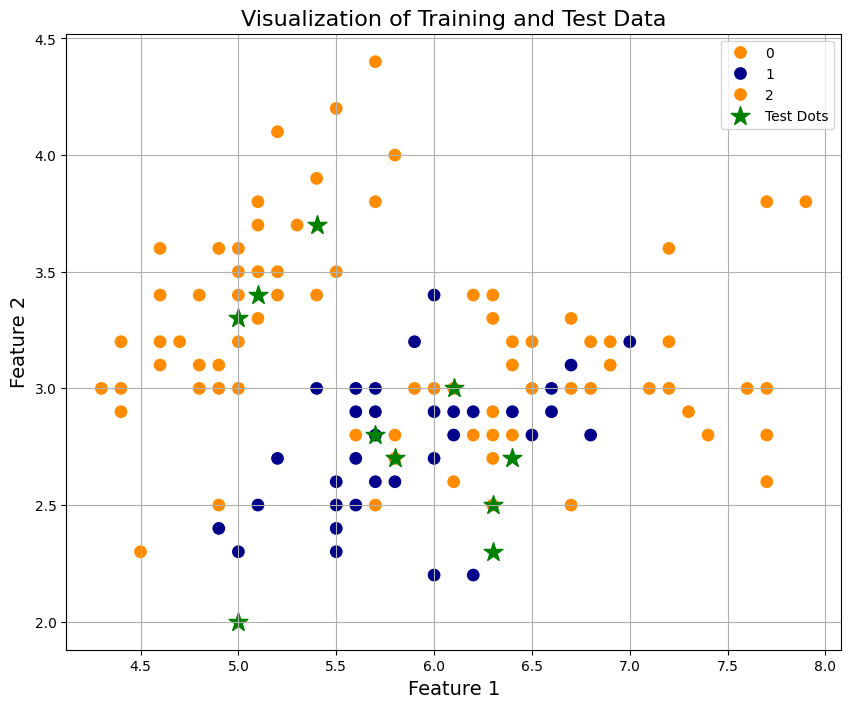

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Создаем цветовую палитру для классов
cmap_bold = ["darkorange", "darkblue"]

# Создаем новую фигуру размером 10x8 дюймов
plt.figure(figsize=(10, 8))

# Визуализируем обучающие данные с помощью scatter plot
sns.scatterplot(
    x=X_train['sepal length (cm)'],  # Первый признак для оси X
    y=X_train['sepal width (cm)'],  # Второй признак для оси Y
    hue=y_train,           # Цвет точек зависит от класса
    palette=cmap_bold,     # Используем нашу цветовую палитру
    edgecolor='w',         # Добавляем белую обводку для точек
    s=100                   # Размер маркеров
)

# Добавляем тестовые точки на график
plt.scatter(
    X_test['sepal length (cm)'],          # Первый признак тестовых данных для оси X
    X_test['sepal width (cm)'],          # Второй признак тестовых данных для оси Y
    c='g',                 # Зеленый цвет для тестовых точек
    marker='*',            # Используем звездочки для обозначения тестовых точек
    s=200,                 # Размер маркеров тестовых точек
    label='Test Dots'      # Метка для легенды
)

# Добавляем заголовок и метки осей
plt.title('Visualization of Training and Test Data', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

# Добавляем сетку для улучшения восприятия
plt.grid(True)

# Добавляем легенду на график
plt.legend()

# Показываем график
plt.show()


### 2. KNN рукописный

#### 2.1. Возьмите два случайных тестовых объектов

In [16]:
display(X_test)
# X_test.reset_index()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
72,6.3,2.5,4.9,1.5
67,5.8,2.7,4.1,1.0
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3


In [17]:
import numpy as np
import pandas as pd

idx = 0
first_index = X_test.index[idx]  #
first_value = X_test.iloc[idx, 0]

distances_data = []

for i, train_dot in enumerate(X_train.values):  #
    distances_data.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - first_value)
    })


distances = pd.DataFrame(distances_data)


#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [18]:
distances.sort_values('dst').head(n_neighbors)


,train_idx,dst
41,41,4.751842
126,126,4.850773
39,39,4.894895
119,119,4.910193
19,19,5.017968
112,112,5.022947
61,61,5.100980
54,54,5.108816
27,27,5.131277
128,128,5.159457


In [19]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Index([41, 126, 39, 119, 19, 112, 61, 54, 27, 128], dtype='int64')

#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [20]:
import numpy as np
import pandas as pd

n_neighbors = 3
results = []


for index in X_test.index:
    top_neighbors = distances.sort_values('dst').head(n_neighbors)


    results.append({
        'test_idx': index,
        'neighbors': top_neighbors['train_idx'].tolist(),
        'distances': top_neighbors['dst'].tolist()
    })

neighbors_results = pd.DataFrame(results)

print(neighbors_results)


   test_idx      neighbors                                          distances
0        87  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...
1       111  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...
2        10  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...
3        91  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...
4        49  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...
5        60  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...
6        72  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...
7        67  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...
8        39  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...
9        55  [41, 126, 39]  [4.751841748206688, 4.850773134253961, 4.89489...


#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [21]:
regression_predictions = {}

for idx in neighbors_results['test_idx']:
    neighbors_indices = neighbors_results.loc[neighbors_results['test_idx'] == idx, 'neighbors'].values[0]
    neighbor_values = [train_values[i] for i in neighbors_indices]
    predicted_value = np.mean(neighbor_values)
    regression_predictions[idx] = predicted_value

for test_idx, pred in regression_predictions.items():
    print(f"Предсказанное значение для объекта {test_idx}: {model3.predict(X_test)}")


Предсказанное значение для объекта 87: [1 2 0 1 0 1 1 1 0 1]
Предсказанное значение для объекта 111: [1 2 0 1 0 1 1 1 0 1]
Предсказанное значение для объекта 10: [1 2 0 1 0 1 1 1 0 1]
Предсказанное значение для объекта 91: [1 2 0 1 0 1 1 1 0 1]
Предсказанное значение для объекта 49: [1 2 0 1 0 1 1 1 0 1]
Предсказанное значение для объекта 60: [1 2 0 1 0 1 1 1 0 1]
Предсказанное значение для объекта 72: [1 2 0 1 0 1 1 1 0 1]
Предсказанное значение для объекта 67: [1 2 0 1 0 1 1 1 0 1]
Предсказанное значение для объекта 39: [1 2 0 1 0 1 1 1 0 1]
Предсказанное значение для объекта 55: [1 2 0 1 0 1 1 1 0 1]


#### 2.5. Сравните с настоящими целевыми значениями этих двух объектов

In [22]:
pred_test = model3.predict(X_test)
pred_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1])

## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [23]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=2000)
X_train.shape, X_test.shape


((18640, 8), (2000, 8))

Затем нормализуйте данные:

In [25]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)

#### 3.2. Обучите модель KNN


In [26]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 3

modelR = KNeighborsRegressor(n_neighbors=n_neighbors)
modelR.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

#### 3.3. Проверьте качество работы модели

In [27]:
from sklearn.metrics import accuracy_score
pred_test = modelR.predict(X_test)
pred_test


array([3.026     , 3.13533333, 2.37733333, ..., 1.76233333, 0.91933333,
       2.20066667])

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = modelR.predict(X_train)


y_test_pred = modelR.predict(X_test)

# Вычисление среднеквадратичной ошибки на обучающей и тестовой выборках
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Вычисление коэффициента детерминации на обучающей и тестовой выборках
r1_train = r2_score(y_train, y_train_pred)
r1_test = r2_score(y_test, y_test_pred)

print(f"Среднеквадратичная ошибка на обучающей выборке: {mse_train}")
print(f"Среднеквадратичная ошибка на тестовой выборке: {mse_test}")
print(f"Коэффициент детерминации на обучающей выборке: {r1_train}")
print(f"Коэффициент детерминации на тестовой выборке: {r1_test}")

Среднеквадратичная ошибка на обучающей выборке: 0.2012024360237184
Среднеквадратичная ошибка на тестовой выборке: 0.4208966443449
Коэффициент детерминации на обучающей выборке: 0.8491964056102381
Коэффициент детерминации на тестовой выборке: 0.6778105188410286


#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

In [29]:
n_neighbors2 = 6

modelR2 = KNeighborsRegressor(n_neighbors=n_neighbors2)
modelR2.fit(X_train, y_train)

y_test_pred2 = modelR2.predict(X_test)

mse_test2 = mean_squared_error(y_test, y_test_pred2)
r2_test = r2_score(y_test, y_test_pred2)
print(f"Среднеквадратичная ошибка на тестовой выборке: {mse_test2}")
print(f"Коэффициент детерминации на тестовой выборке: {r2_test}")

Среднеквадратичная ошибка на тестовой выборке: 0.37509862650448056
Коэффициент детерминации на тестовой выборке: 0.7128681506952343


In [30]:
n_neighbors3 = 12

modelR3 = KNeighborsRegressor(n_neighbors=n_neighbors3)
modelR3.fit(X_train, y_train)

y_test_pred3 = modelR3.predict(X_test)

mse_test3 = mean_squared_error(y_test, y_test_pred3)

r3_test = r2_score(y_test, y_test_pred3)

print(f"Среднеквадратичная ошибка на тестовой выборке: {mse_test3}")

print(f"Коэффициент детерминации на тестовой выборке: {r3_test}")

Среднеквадратичная ошибка на тестовой выборке: 0.3695022848896725
Коэффициент детерминации на тестовой выборке: 0.7171520584561758


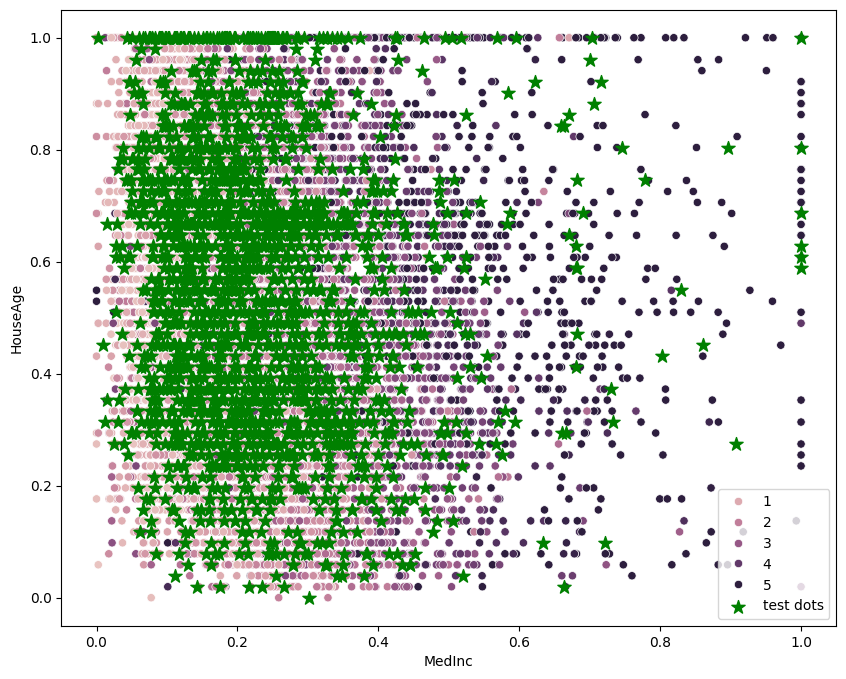

In [31]:
# Создаем новую фигуру размером 10x8 дюймов
plt.figure(figsize=(10, 8))

# Визуализируем обучающие данные с помощью scatter plot
sns.scatterplot(
    x=X_train['MedInc'],  # Первый признак для оси X
    y=X_train['HouseAge'],  # Второй признак для оси Y
    hue=y_train       # Цвет точек зависит от целевого значения
)

# Добавляем тестовые точки на график
plt.scatter(X_test['MedInc'], X_test['HouseAge'],
            c='g',            # Зеленый цвет для тестовых точек
            marker='*',       # Используем звездочки для обозначения тестовых точек
            s=100,            # Размер маркеров
            label='test dots') # Метка для легенды

# Добавляем легенду на график
plt.legend()

### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [32]:
idx = 15
first_index = X_test.index[idx]  #
first_value = X_test.iloc[idx, 1]

distances_data = []

for i, train_dot in enumerate(X_train.values):  #
    distances_data.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - first_value)
    })


distances = pd.DataFrame(distances_data)

#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [33]:
distances.sort_values('dst').head(n_neighbors)

,train_idx,dst
2819,2819,1.753779
17029,17029,1.857208
6829,6829,1.898800


#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [34]:
n_neighbors = 21
results = []


for index in X_test.index:
    top_neighbors = distances.sort_values('dst').head(n_neighbors)


    results.append({
        'test_idx': index,
        'neighbors': top_neighbors['train_idx'].tolist(),
        'distances': top_neighbors['dst'].tolist()
    })

neighbors_results = pd.DataFrame(results)

print(neighbors_results)


      test_idx                                          neighbors  \
0            0  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   
1            1  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   
2            2  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   
3            3  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   
4            4  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   
...        ...                                                ...   
1995      1995  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   
1996      1996  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   
1997      1997  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   
1998      1998  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   
1999      1999  [2819, 17029, 6829, 16274, 6809, 14590, 7032, ...   

                                              distances  
0     [1.7537794917115832, 1.8572082233500613, 1.898...  
1     [1.7537794917115832, 1.8572082233500613, 1.898...

In [35]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Index([ 2819, 17029,  6829, 16274,  6809, 14590,  7032, 16971,  4254, 12894,
        2852, 10646, 16407, 15171,  6317, 15971, 12988, 13616,  1631,  7200,
       17206],
      dtype='int64')

In [36]:
first_index = nearest_neigbors_idxs[0]
X_train.loc[first_index,'MedInc']

0.2844857312312934

#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

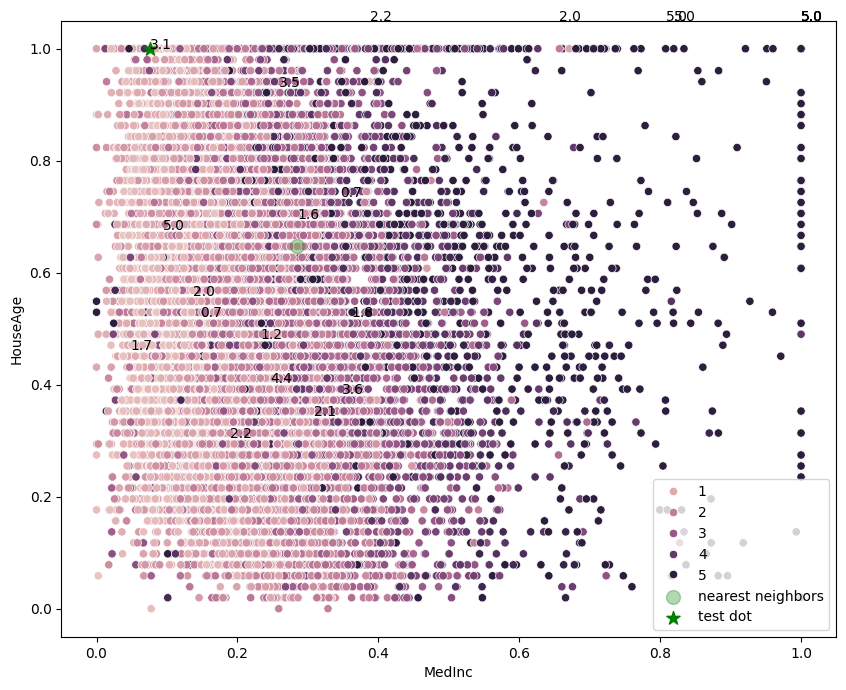

In [37]:
# Создаем новую фигуру размером 10x8 дюймов
plt.figure(figsize=(10, 8))

# Создаем scatter plot для всех точек обучающего набора
# x-координаты - первый признак, y-координаты - второй признак
# Цвет точек зависит от целевой переменной y_train
sns.scatterplot(
    x=X_train['MedInc'],
    y=X_train['HouseAge'],
    hue=y_train,
)
first_index = nearest_neigbors_idxs[0]
# Выделяем k ближайших соседей зеленым цветом
plt.scatter(X_train.iloc[first_index,0], X_train.iloc[first_index,1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

# Вычисляем предсказание как среднее значение целевой переменной k ближайших соседей
pred = np.mean(y_train[nearest_neigbors_idxs])

# Отображаем тестовую точку зеленой звездочкой
plt.scatter(X_test.iloc[idx, 0], X_test.iloc[idx, 1], c='g', marker='*', s=100, label='test dot')

# Подписываем тестовую точку предсказанным значением
plt.annotate(round(pred, 1), (X_test.iloc[idx, 0], X_test.iloc[idx, 1]))

# Подписываем каждого из k ближайших соседей их фактическим значением целевой переменной
for i, txt in enumerate(y_train[nearest_neigbors_idxs]):
    plt.annotate(round(txt, 1), (X_train.iloc[nearest_neigbors_idxs[i], 0], X_train.iloc[nearest_neigbors_idxs[i], 1] + 0.05))

# Добавляем легенду на график
plt.legend();


#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

In [38]:
display(pred_test, y_test)

array([3.026     , 3.13533333, 2.37733333, ..., 1.76233333, 0.91933333,
       2.20066667])

array([1.674, 3.541, 1.602, ..., 1.836, 1.089, 2.819])

Предсказания отклоняются от истины, но не так сильно, они довольно близки.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [39]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [41]:
new_x = X.iloc[:, [0, 3]]
print(new_x)

     sepal length (cm)  petal width (cm)
0                  5.1               0.2
1                  4.9               0.2
2                  4.7               0.2
3                  4.6               0.2
4                  5.0               0.2
..                 ...               ...
145                6.7               2.3
146                6.3               1.9
147                6.5               2.0
148                6.2               2.3
149                5.9               1.8

[150 rows x 2 columns]


### Визуализируйте ваши данные на графике

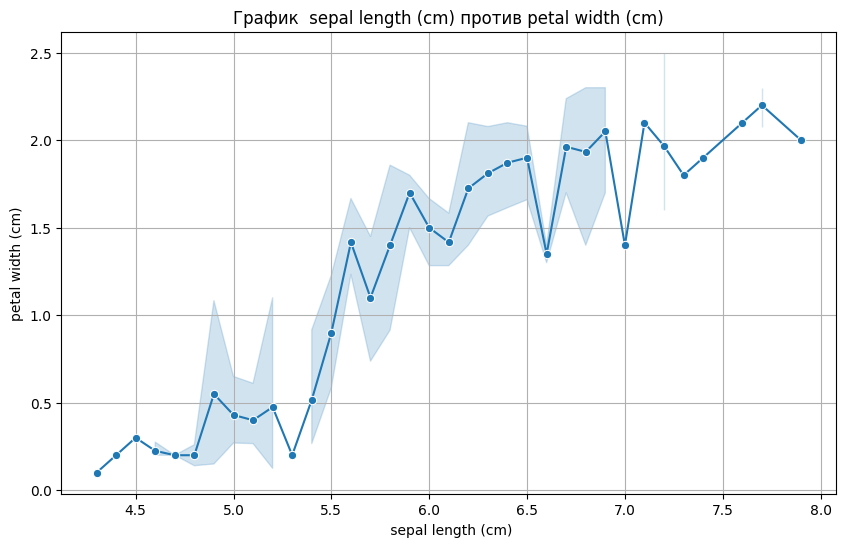

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=new_x, x='sepal length (cm)', y='petal width (cm)', marker='o')
plt.title('График  sepal length (cm) против petal width (cm)')
plt.xlabel(' sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid()
plt.show()


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=5)
X_train.shape, X_test.shape

((145, 4), (5, 4))

#### 1.2. Обучите модель KNN на 50 соседях

In [44]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 50
model = KNeighborsClassifier(n_neighbors=n_neighbors)

In [45]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### 1.3. Проверьте качество работы модели

In [46]:
pred_test = model.predict(X_test)
pred_test


array([0, 2, 0, 0, 1])

In [47]:
display(pred_test, y_test)

array([0, 2, 0, 0, 1])

array([0, 2, 0, 0, 2])

C:\Users\Nick\AppData\Local\Temp\ipykernel_16472\413228932.py:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


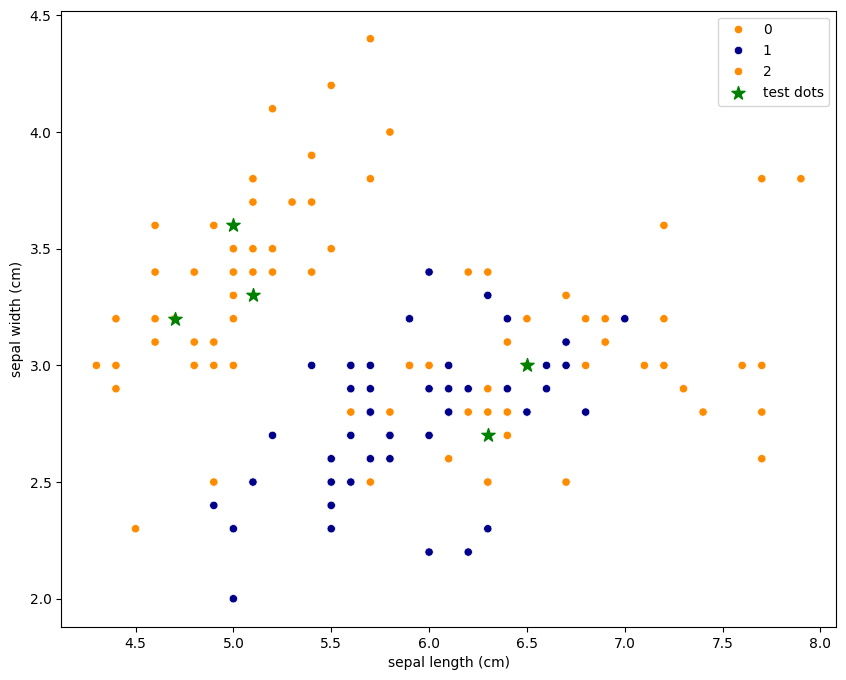

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c='g', marker='*', s=100, label='test dots')
plt.legend();

#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [49]:
import numpy as np
import pandas as pd

# Выбираем индекс тестовой точки
idx = 0
# Получаем тестовую точку из тестового набора данных
test_dot = X_test.iloc[idx]

# Создаем список для хранения расстояний
distances_data = []

# Проходим по всем точкам обучающего набора
for i, train_dot in enumerate(X_train.values):
    # Вычисляем евклидово расстояние между тестовой и обучающей точкой
    distance = np.linalg.norm(train_dot - test_dot, ord=2)
    # Добавляем индекс точки и расстояние в список
    distances_data.append({
        'train_idx': i,
        'dst': distance
    })

# Создаем DataFrame из списка расстояний
distances = pd.DataFrame(distances_data)


#### 1.5. Выберите топ  k  соседей


In [50]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs


Index([ 15,  18,  35, 109,  90,   2,  42, 118,  79, 116,  39,  34,  93, 133,
       100, 103,  97, 115,  48, 128,  43,  89,  76,  64,  52,  27,  14,  96,
        80,  94,  23,  17, 136, 113, 137,  25,  40,  61,  92,  86,  50,  51,
        63, 130,  28, 126,  95,  75, 114,  24],
      dtype='int64')

C:\Users\Nick\AppData\Local\Temp\ipykernel_16472\180449166.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


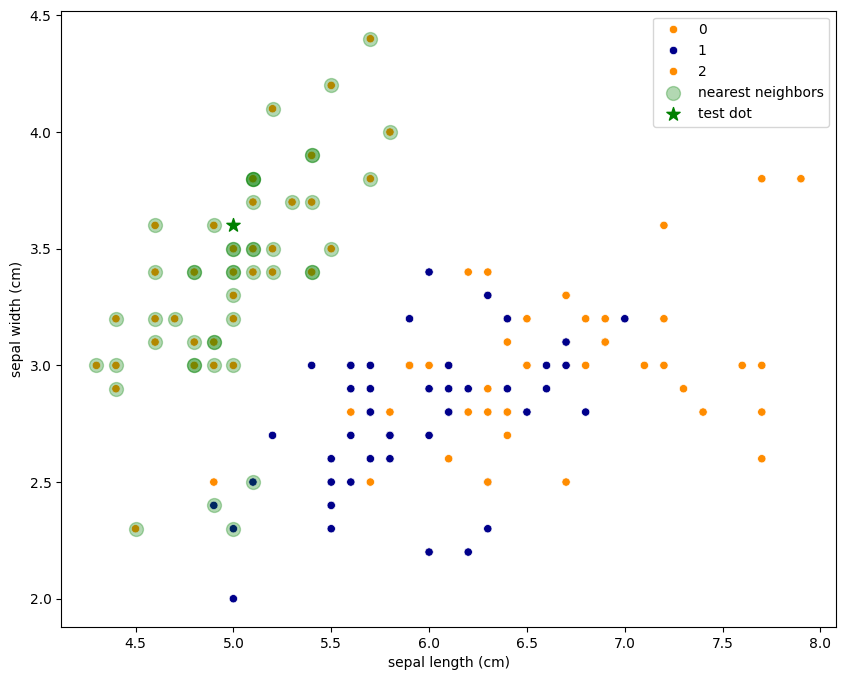

In [51]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train.iloc[nearest_neigbors_idxs, 0], X_train.iloc[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test.iloc[idx, 0], X_test.iloc[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();

#### 1.6. Выведите финальное предсказание для этого объекта

In [52]:
# Извлекаем объект из X_test по индексу idx
sample = X_test.iloc[idx, :].values.reshape(1, -1)  # Преобразуем в нужный формат

# Получаем предсказание
prediction = model.predict(sample)

# Выводим предсказание
print(f'Предсказание для объекта с индексом {idx}: {prediction}')

Предсказание для объекта с индексом 0: [0]


c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [53]:
idx = 4 # Измените на нужный индекс

# Извлекаем объект из X_test по индексу idx
sample = X_test.iloc[idx, :].values.reshape(1, -1)

# Получаем предсказание
prediction = model.predict(sample)

# Получаем истинное значение
true_value = y_test[idx]

# Выводим предсказание и истинное значение
print(f'Предсказание для объекта с индексом {idx}: {prediction[0]}')
print(f'Истинное значение для объекта с индексом {idx}: {true_value}')



Предсказание для объекта с индексом 4: 1
Истинное значение для объекта с индексом 4: 2


c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [54]:
n_neighbors = 20
model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')


In [55]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, weights='distance')

#### 2.2. Проверьте качество работы модели


In [56]:
pred_test = model.predict(X_test)
display(pred_test, y_test)

array([0, 2, 0, 0, 2])

array([0, 2, 0, 0, 2])

#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [57]:
 # Выбираем индекс тестовой точки
idx = 0
# Получаем тестовую точку из тестового набора данных
test_dot = X_test.iloc[idx]

# Создаем список для хранения расстояний
distances_data = []

# Проходим по всем точкам обучающего набора
for i, train_dot in enumerate(X_train.values):
    # Вычисляем евклидово расстояние между тестовой и обучающей точкой
    distance = np.linalg.norm(train_dot - test_dot, ord=2)
    # Добавляем индекс точки и расстояние в список
    distances_data.append({
        'train_idx': i,
        'dst': distance,
        'label': y_train[i]
    })

# Создаем DataFrame из списка расстояний
distances = pd.DataFrame(distances_data)
distances

,train_idx,dst,label
0,0,3.167018,1
1,1,4.614109,2
2,2,0.244949,0
3,3,4.645428,2
4,4,3.148015,1
...,...,...,...
140,140,4.678675,2
141,141,2.557342,1
142,142,5.676266,2
143,143,3.616628,2


In [58]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Index([ 15,  18,  35, 109,  90,   2,  42, 118,  79, 116,  39,  34,  93, 133,
       100, 103,  97, 115,  48, 128],
      dtype='int64')

#### 2.4. Выберите топ  k  соседей


C:\Users\Nick\AppData\Local\Temp\ipykernel_16472\356924300.py:7: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


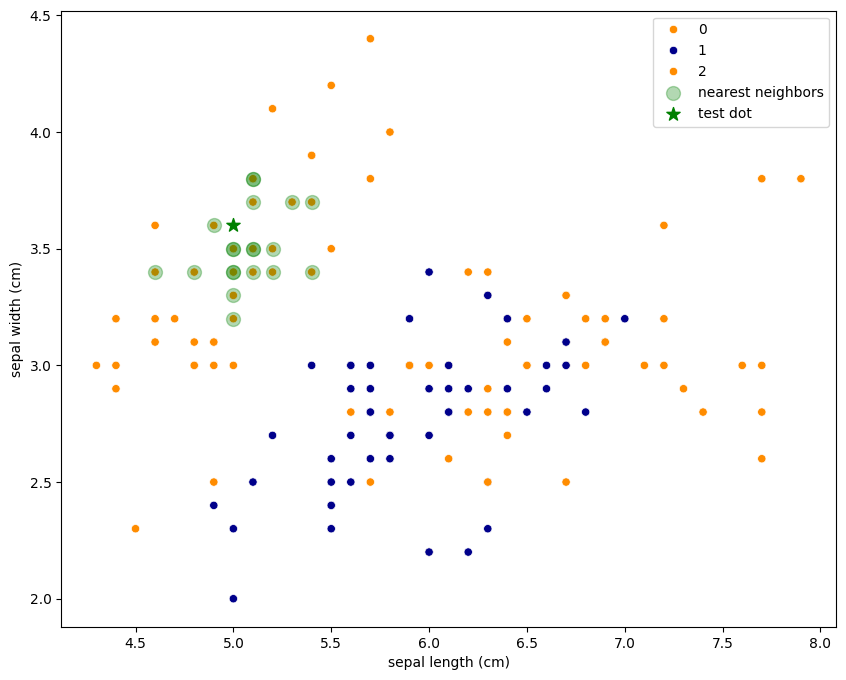

In [59]:
import numpy as np
import pandas as pd
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train.iloc[nearest_neigbors_idxs, 0], X_train.iloc[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test.iloc[idx, 0], X_test.iloc[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();


#### 2.5. Рассчитайте вес для каждого соседа

In [60]:
distances['weight'] = 1 / distances['dst']
distances = distances.sort_values('dst').head(n_neighbors)
distances

,train_idx,dst,label,weight
15,15,0.141421,0,7.071068
18,18,0.141421,0,7.071068
35,35,0.173205,0,5.773503
109,109,0.173205,0,5.773503
90,90,0.223607,0,4.472136
2,2,0.244949,0,4.082483
42,42,0.244949,0,4.082483
118,118,0.264575,0,3.779645
79,79,0.264575,0,3.779645
116,116,0.282843,0,3.535534


#### 2.6. Выведите финальное предсказание для этого объекта

C:\Users\Nick\AppData\Local\Temp\ipykernel_16472\2476219921.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, 1/(x))


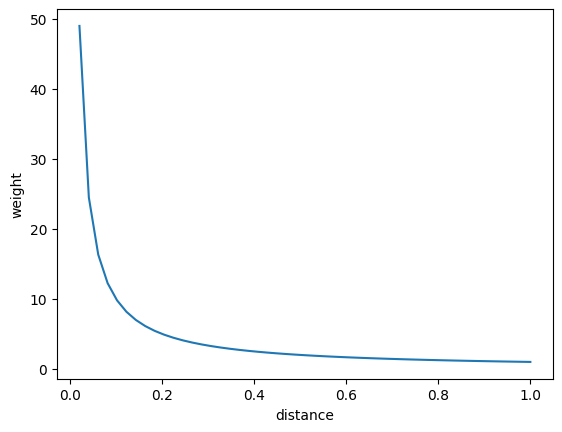

In [61]:
x = np.linspace(0, 1, 50)
plt.plot(x, 1/(x))
plt.ylabel('weight')
plt.xlabel('distance');


In [62]:
display(f"Вес для класса 0 - {distances[distances['label'] == 0]['weight'].sum()}",
        f"Вес для класса 1 - {distances[distances['label'] == 1]['weight'].sum()}")

'Вес для класса 0 - 75.83379732843296'

'Вес для класса 1 - 0.0'

#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [63]:
idx = 4 # Измените на нужный индекс

# Извлекаем объект из X_test по индексу idx
sample = X_test.iloc[idx, :].values.reshape(1, -1)

# Получаем предсказание
prediction = model.predict(sample)

# Получаем истинное значение
true_value = y_test[idx]

# Выводим предсказание и истинное значение
print(f'Предсказание для объекта с индексом {idx}: {prediction[0]}')
print(f'Истинное значение для объекта с индексом {idx}: {true_value}')


Предсказание для объекта с индексом 4: 2
Истинное значение для объекта с индексом 4: 2


c:\Users\Nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

C:\Users\Nick\AppData\Local\Temp\ipykernel_16472\2307439360.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


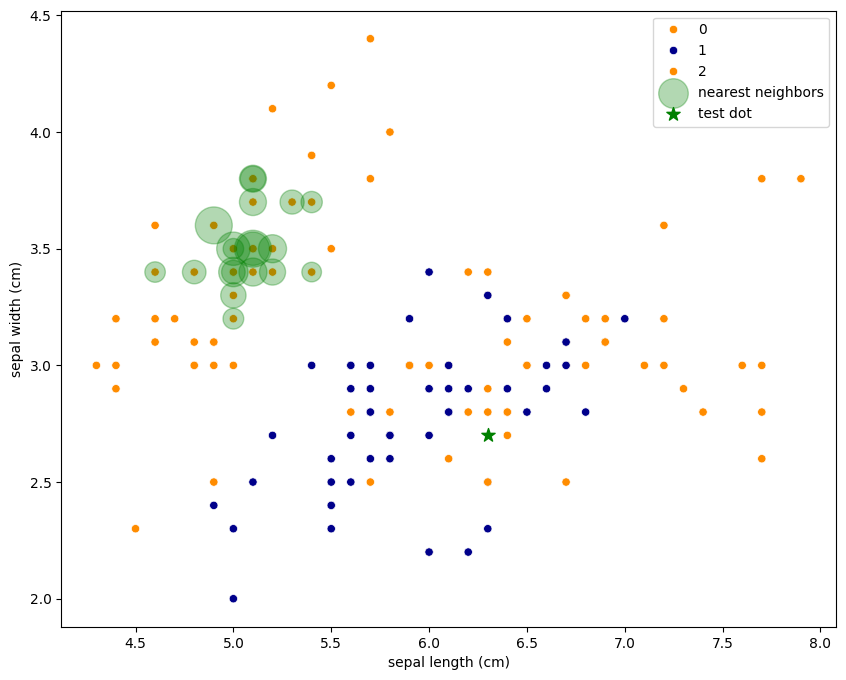

In [64]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train.iloc[nearest_neigbors_idxs, 0], X_train.iloc[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=distances['weight']*100, label='nearest neighbors')

plt.scatter(X_test.iloc[idx, 0], X_test.iloc[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();


### 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [65]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Nick\scikit_learn_data


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


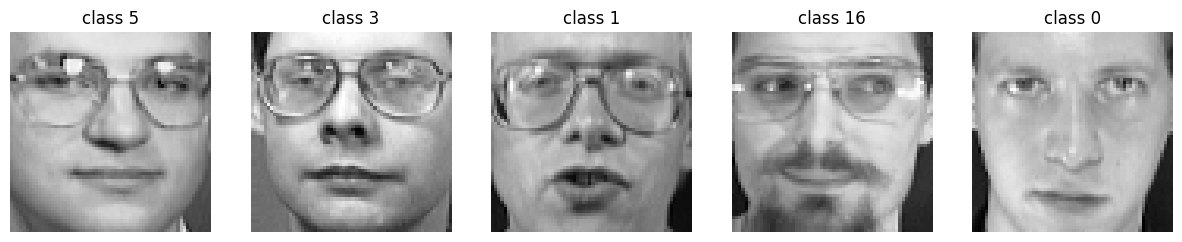

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [67]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=50)
X_train.shape, X_test.shape


((350, 4096), (50, 4096))

#### 3.1.2. Обучите модель KNN на 50 соседях

In [69]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 50
model = KNeighborsClassifier(n_neighbors=n_neighbors)


In [70]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

#### 3.1.3. Проверьте качество работы модели


In [71]:
pred_test = model.predict(X_test)
pred_test


array([ 8, 12, 12, 37, 24, 14, 13, 21, 24, 17,  8, 29,  4, 14,  4, 10,  5,
       35, 29, 21, 32, 21, 24, 24, 12, 12, 29, 14, 17, 29, 33, 17, 17, 23,
       24, 29, 29, 12, 14, 36, 24,  4, 17,  8, 13, 14, 24, 24, 26, 29])

In [72]:
display(pred_test, y_test)

array([ 8, 12, 12, 37, 24, 14, 13, 21, 24, 17,  8, 29,  4, 14,  4, 10,  5,
       35, 29, 21, 32, 21, 24, 24, 12, 12, 29, 14, 17, 29, 33, 17, 17, 23,
       24, 29, 29, 12, 14, 36, 24,  4, 17,  8, 13, 14, 24, 24, 26, 29])

array([30,  3, 27, 37, 25, 31, 13, 38, 22, 17,  8, 19, 39, 14, 20, 10, 35,
        6, 20, 28, 32, 21,  9,  4, 19, 28, 23, 30,  6, 29, 33,  6, 17, 23,
       27, 20, 29, 28, 23, 36, 25, 16,  0, 11, 13, 14, 13, 27, 26, 30])

### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [73]:
n_neighbors = 50
model2 = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')


In [74]:
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [75]:
pred_test = model2.predict(X_test)
display(pred_test, y_test)

array([29, 12, 12, 37, 24, 14, 13, 38, 24, 17,  8, 29,  4, 14, 20, 10,  5,
       35, 29, 38, 32, 21, 24, 29, 12, 28, 29, 30, 31, 29, 33, 17, 17, 23,
       24, 20, 29, 28, 14, 36, 24, 16, 17, 22, 13, 14, 13, 27, 26, 29])

array([30,  3, 27, 37, 25, 31, 13, 38, 22, 17,  8, 19, 39, 14, 20, 10, 35,
        6, 20, 28, 32, 21,  9,  4, 19, 28, 23, 30,  6, 29, 33,  6, 17, 23,
       27, 20, 29, 28, 23, 36, 25, 16,  0, 11, 13, 14, 13, 27, 26, 30])

### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [76]:
idx = 20

test_dot = X_test.iloc[idx]


distances_data = []

for i, train_dot in enumerate(X_train.values):
    # Вычисляем евклидово расстояние между тестовой и обучающей точкой
    distance = np.linalg.norm(train_dot - test_dot, ord=2)
    # Добавляем индекс точки и расстояние в список
    distances_data.append({
        'train_idx': i,
        'dst': distance,
        'label': y_train[i]
    })

# Создаем DataFrame из списка расстояний
distances = pd.DataFrame(distances_data)
distances


distances['weight'] = 1 / distances['dst']
distances = distances.sort_values('dst').head(n_neighbors)
distances

,train_idx,dst,label,weight
123,123,5.058876,32,0.197672
169,169,5.462538,32,0.183065
254,254,6.344342,32,0.157621
310,310,7.301629,32,0.136956
205,205,7.396976,32,0.135190
47,47,7.450420,32,0.134221
5,5,7.688578,32,0.130063
81,81,7.698625,32,0.129893
100,100,7.935468,32,0.126017
179,179,8.592975,29,0.116374


#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from collections import Counter

# 1. Определение функции для вычисления весов
def compute_weights(distances):
    # Используем обратную пропорцию расстояния для вычисления весов
    weights = 1 / (distances + 1e-5)  # Добавляем маленькое значение для избежания деления на ноль
    return weights

# 2. Реализация KNN с учетом весов
class WeightedKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            # Вычисляем расстояния до всех точек в обучающем наборе
            distances = np.linalg.norm(self.X_train - x, axis=1)
            # Находим индексы k ближайших соседей
            k_indices = np.argsort(distances)[:self.k]
            # Получаем метки классов ближайших соседей
            k_nearest_labels = self.y_train[k_indices]
            # Вычисляем веса
            weights = compute_weights(distances[k_indices])
            # Суммируем веса для каждого класса
            weighted_votes = Counter()
            for label, weight in zip(k_nearest_labels, weights):
                weighted_votes[label] += weight
            # Получаем предсказанный класс
            predictions.append(weighted_votes.most_common(1)[0][0])
        return np.array(predictions)

# 3. Проверка качества работы модели
# Загрузка данных (например, Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = WeightedKNN(k=3)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Weighted KNN: {accuracy:.2f}")


Accuracy of Weighted KNN: 1.00


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [78]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [79]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [80]:
new_x = X[['MedInc']].head(1000)
print(new_x)
new_y = y[:1000]

     MedInc
0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
..      ...
995  4.8624
996  9.1531
997  4.7361
998  5.4324
999  4.9375

[1000 rows x 1 columns]


### Отрисуйте данные на графике

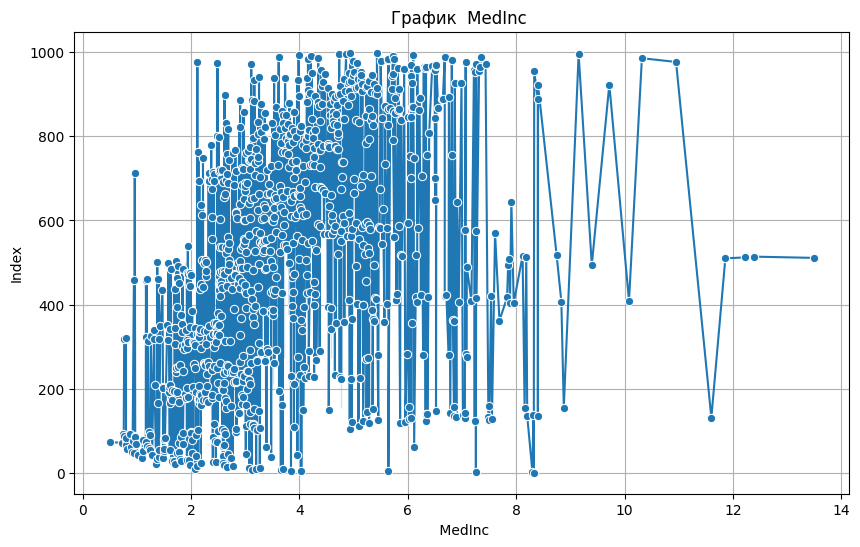

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=new_x, x='MedInc', y=new_x.index, marker='o')
plt.title('График  MedInc ')
plt.xlabel(' MedInc')
plt.ylabel('Index')
plt.grid()
plt.show()


### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, random_state=6, test_size=100)
X_train.shape, X_test.shape


((900, 1), (100, 1))

#### 4.2. Обучите модель KNN на 100 соседях


In [83]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 100
model4 = KNeighborsRegressor(n_neighbors=n_neighbors)

model4.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 4.3. Проверьте качество работы модели


In [84]:
pred_test = model4.predict(X_test)
display(pred_test, y_test)

array([3.2934001, 1.32013  , 2.42708  , 2.55322  , 1.68327  , 1.98058  ,
       1.9458   , 3.3383702, 1.85925  , 1.30716  , 2.01039  , 1.3792602,
       2.62483  , 2.30902  , 2.06513  , 1.93107  , 1.34301  , 1.3790202,
       1.29874  , 1.93342  , 1.5748   , 1.98058  , 1.96627  , 1.98149  ,
       1.94867  , 2.06466  , 1.3749902, 1.3790202, 3.4153004, 1.33176  ,
       1.9554   , 1.93291  , 1.28501  , 2.61349  , 1.93084  , 1.3704902,
       1.98129  , 2.24856  , 1.95918  , 1.85522  , 2.40933  , 1.89629  ,
       1.9335   , 1.96671  , 2.25819  , 1.3460802, 2.38635  , 1.33503  ,
       3.4367805, 2.28361  , 1.93537  , 3.3318502, 1.96667  , 1.42412  ,
       1.27993  , 1.95918  , 1.31408  , 3.4741305, 1.95881  , 1.93883  ,
       1.94245  , 1.55881  , 2.20022  , 1.94169  , 1.34191  , 1.28501  ,
       1.3704902, 1.95137  , 1.97617  , 2.61349  , 1.29961  , 1.94186  ,
       1.75931  , 3.4367805, 2.06075  , 2.03017  , 1.97553  , 1.9515   ,
       1.89629  , 3.22139  , 1.3677702, 1.94169  , 

array([3.932  , 1.139  , 2.563  , 2.614  , 1.406  , 1.962  , 1.584  ,
       3.275  , 1.214  , 0.923  , 1.791  , 0.831  , 3.3    , 2.032  ,
       1.904  , 1.888  , 1.022  , 1.194  , 1.325  , 1.76   , 2.41   ,
       2.701  , 2.356  , 1.926  , 1.582  , 2.188  , 0.871  , 1.875  ,
       5.00001, 1.313  , 2.039  , 1.201  , 1.555  , 3.33   , 2.418  ,
       0.952  , 2.594  , 1.635  , 1.741  , 2.574  , 2.202  , 1.505  ,
       3.5    , 1.975  , 2.476  , 0.875  , 1.924  , 1.     , 4.429  ,
       2.067  , 2.19   , 3.629  , 1.649  , 1.469  , 0.846  , 2.341  ,
       0.975  , 4.103  , 3.096  , 1.996  , 2.768  , 2.359  , 2.074  ,
       2.033  , 1.279  , 1.4    , 2.417  , 1.161  , 1.889  , 2.535  ,
       2.115  , 1.872  , 2.116  , 3.352  , 2.613  , 2.06   , 1.578  ,
       2.192  , 1.228  , 2.825  , 1.049  , 3.422  , 2.385  , 2.318  ,
       2.593  , 2.065  , 3.97   , 1.266  , 1.375  , 1.429  , 1.023  ,
       2.486  , 3.134  , 2.25   , 2.435  , 3.524  , 1.929  , 2.351  ,
       2.644  , 0.97

#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [85]:
idx = 21
first_index = X_test.index[idx]  #
first_value = X_test.iloc[idx, 0]

distances_data = []

for i, train_dot in enumerate(X_train.values):  #
    distances_data.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - first_value)
    })


distances = pd.DataFrame(distances_data)



#### 4.5. Выберите топ  k  соседей


In [86]:
distances.sort_values('dst').head(n_neighbors)
n_neighbors = 21
results = []


for index in X_test.index:
    top_neighbors = distances.sort_values('dst').head(n_neighbors)


    results.append({
        'test_idx': index,
        'neighbors': top_neighbors['train_idx'].tolist(),
        'distances': top_neighbors['dst'].tolist()
    })

neighbors_results = pd.DataFrame(results)

print(neighbors_results)
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs


    test_idx                                          neighbors  \
0        978  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
1         22  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
2        909  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
3        399  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
4        438  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
..       ...                                                ...   
95       156  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
96       678  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
97       643  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
98       925  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
99       331  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   

                                            distances  
0   [0.0038000000000000256, 0.005799999999999805, ...  
1   [0.0038000000000000256, 0.005799999999999805, ...  
2   [0.0038000000000000256,

Index([528, 270, 839, 486, 529, 577, 374, 164, 719, 592,  35, 165, 246,  86,
       866, 491, 780, 852, 387, 725, 771],
      dtype='int64')

#### 4.6. Выведите финальное предсказание для этого объекта

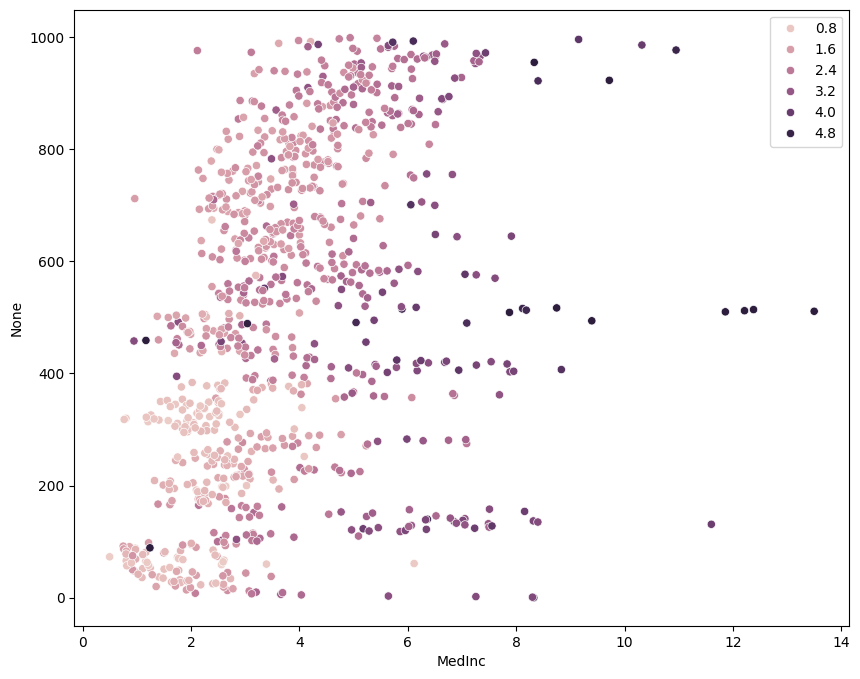

In [87]:
first_index = nearest_neigbors_idxs[0]
X_train.loc[first_index,'MedInc']
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train['MedInc'],
    y=X_train.index,
    hue=y_train,
)
first_index = nearest_neigbors_idxs[0]



plt.legend();

### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [88]:
n_neighbors = 100
model = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')

In [89]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 5.2. Проверьте качество работы модели


In [90]:

pred_test = model.predict(X_test)
display(pred_test, y_test)

array([3.2082958 , 2.875     , 2.51955781, 2.46946682, 1.84526174,
       1.569     , 2.17750045, 3.38324184, 1.69460897, 1.2740097 ,
       1.97984273, 1.09611638, 2.50285915, 2.12980118, 2.254401  ,
       2.13569204, 1.20118456, 1.1711622 , 1.18050869, 2.19046716,
       1.58213056, 1.86752949, 1.895     , 1.837     , 1.57545778,
       2.16835386, 1.21841348, 1.27596505, 3.80725874, 1.29548763,
       1.85108121, 1.94896462, 1.57769031, 2.53111893, 2.21819525,
       1.34958121, 1.82692501, 2.901     , 1.65773846, 1.62741351,
       2.50833559, 1.84058966, 1.96258285, 1.512     , 2.17784883,
       1.13836874, 2.46665773, 1.24201571, 3.75547479, 2.34733732,
       2.01780878, 3.37297298, 1.669     , 1.34343942, 1.29548862,
       1.57118338, 2.0033909 , 3.94147433, 2.10180327, 1.076     ,
       1.93760152, 1.48174788, 1.99007294, 1.9247033 , 1.508     ,
       0.955     , 1.37413892, 1.779     , 1.89213749, 2.56640258,
       1.46473553, 1.99264394, 1.56041631, 4.03937391, 2.13200

array([3.932  , 1.139  , 2.563  , 2.614  , 1.406  , 1.962  , 1.584  ,
       3.275  , 1.214  , 0.923  , 1.791  , 0.831  , 3.3    , 2.032  ,
       1.904  , 1.888  , 1.022  , 1.194  , 1.325  , 1.76   , 2.41   ,
       2.701  , 2.356  , 1.926  , 1.582  , 2.188  , 0.871  , 1.875  ,
       5.00001, 1.313  , 2.039  , 1.201  , 1.555  , 3.33   , 2.418  ,
       0.952  , 2.594  , 1.635  , 1.741  , 2.574  , 2.202  , 1.505  ,
       3.5    , 1.975  , 2.476  , 0.875  , 1.924  , 1.     , 4.429  ,
       2.067  , 2.19   , 3.629  , 1.649  , 1.469  , 0.846  , 2.341  ,
       0.975  , 4.103  , 3.096  , 1.996  , 2.768  , 2.359  , 2.074  ,
       2.033  , 1.279  , 1.4    , 2.417  , 1.161  , 1.889  , 2.535  ,
       2.115  , 1.872  , 2.116  , 3.352  , 2.613  , 2.06   , 1.578  ,
       2.192  , 1.228  , 2.825  , 1.049  , 3.422  , 2.385  , 2.318  ,
       2.593  , 2.065  , 3.97   , 1.266  , 1.375  , 1.429  , 1.023  ,
       2.486  , 3.134  , 2.25   , 2.435  , 3.524  , 1.929  , 2.351  ,
       2.644  , 0.97

#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [91]:
idx = 21
first_index = X_test.index[idx]  #
first_value = X_test.iloc[idx, 0]

distances_data = []

for i, train_dot in enumerate(X_train.values):  #
    distances_data.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - first_value)
    })


distances = pd.DataFrame(distances_data)


#### 5.4. Выберите топ  k  соседей


In [92]:
distances.sort_values('dst').head(n_neighbors)
n_neighbors = 21
results = []


for index in X_test.index:
    top_neighbors = distances.sort_values('dst').head(n_neighbors)


    results.append({
        'test_idx': index,
        'neighbors': top_neighbors['train_idx'].tolist(),
        'distances': top_neighbors['dst'].tolist()
    })

neighbors_results = pd.DataFrame(results)

print(neighbors_results)
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs



    test_idx                                          neighbors  \
0        978  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
1         22  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
2        909  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
3        399  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
4        438  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
..       ...                                                ...   
95       156  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
96       678  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
97       643  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
98       925  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   
99       331  [528, 270, 839, 486, 529, 577, 374, 164, 719, ...   

                                            distances  
0   [0.0038000000000000256, 0.005799999999999805, ...  
1   [0.0038000000000000256, 0.005799999999999805, ...  
2   [0.0038000000000000256,

Index([528, 270, 839, 486, 529, 577, 374, 164, 719, 592,  35, 165, 246,  86,
       866, 491, 780, 852, 387, 725, 771],
      dtype='int64')

#### 5.5. Рассчитайте вес для каждого соседа

In [93]:

distances['weight'] = 1 / distances['dst']
distances = distances.sort_values('dst').head(n_neighbors)
distances


,train_idx,dst,weight
528,528,0.0038,263.157895
270,270,0.0058,172.413793
839,839,0.0132,75.757576
486,486,0.0155,64.516129
529,529,0.0184,54.347826
577,577,0.0251,39.840637
374,374,0.0257,38.910506
164,164,0.0303,33.003300
719,719,0.0303,33.003300
592,592,0.0352,28.409091


#### 5.6. Выведите финальное предсказание для этого объекта

C:\Users\Nick\AppData\Local\Temp\ipykernel_16472\3067636234.py:5: UserWarning: 
The palette list has fewer values (2) than needed (716) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


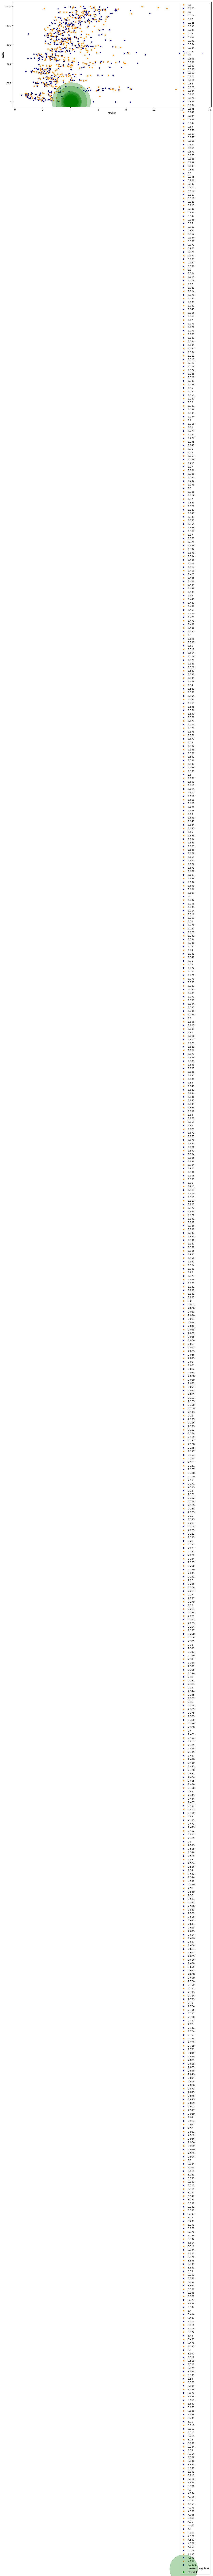

In [94]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(15, 8))
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.index,
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train.iloc[nearest_neigbors_idxs, 0], X_train.iloc[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=distances['weight']*100, label='nearest neighbors')

plt.scatter(X_test.iloc[idx, 0], X_test.iloc[idx], c='g', marker='*', s=100, label='test dot')
plt.legend();

## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [95]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [96]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

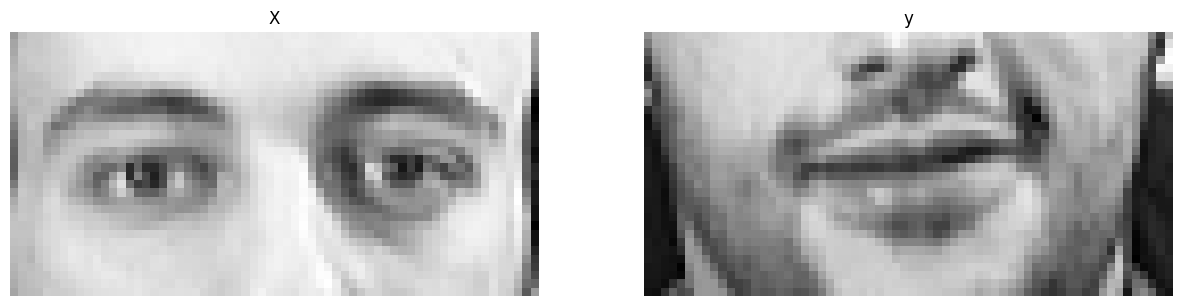

In [97]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [98]:
n_neighbors = 100
model = KNeighborsRegressor(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [99]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None}

In [100]:
pred_test['knn'] = model.predict(X_test)
display(pred_test, y_test)


{'knn': array([[0.60450435, 0.64760345, 0.6827271 , ..., 0.2609091 , 0.2559091 ,
         0.25272727],
        [0.49983472, 0.5175619 , 0.5516942 , ..., 0.317686  , 0.2982231 ,
         0.29342982],
        [0.5943803 , 0.63520664, 0.672314  , ..., 0.2786777 , 0.27028924,
         0.26619834],
        ...,
        [0.51289254, 0.5232231 , 0.5395041 , ..., 0.35685948, 0.34962806,
         0.33925614],
        [0.49772727, 0.51483464, 0.5403306 , ..., 0.33293393, 0.31690082,
         0.3172727 ],
        [0.43400833, 0.4430579 , 0.46677685, ..., 0.39107448, 0.38297522,
         0.3715702 ]], dtype=float32),
 'weighted_knn': None,
 'weighted_knn_custom': None}

array([[0.6735537 , 0.78099173, 0.79752064, ..., 0.12809917, 0.12396694,
        0.14049587],
       [0.58677685, 0.61570245, 0.6652893 , ..., 0.1446281 , 0.15289256,
        0.15289256],
       [0.6983471 , 0.73140496, 0.74793386, ..., 0.2231405 , 0.24380165,
        0.2231405 ],
       ...,
       [0.43801653, 0.47107437, 0.4876033 , ..., 0.20661157, 0.19421488,
        0.19008264],
       [0.44214877, 0.44214877, 0.49173555, ..., 0.3140496 , 0.3140496 ,
        0.32231405],
       [0.2644628 , 0.30991736, 0.32231405, ..., 0.35123968, 0.21900827,
        0.23553719]], dtype=float32)

#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [101]:
n_neighbors = 100
model = KNeighborsRegressor(n_neighbors=n_neighbors,weights='distance' )
model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [102]:
pred_test['weighted_knn'] = model.predict(X_test)
display(pred_test, y_test)


{'knn': array([[0.60450435, 0.64760345, 0.6827271 , ..., 0.2609091 , 0.2559091 ,
         0.25272727],
        [0.49983472, 0.5175619 , 0.5516942 , ..., 0.317686  , 0.2982231 ,
         0.29342982],
        [0.5943803 , 0.63520664, 0.672314  , ..., 0.2786777 , 0.27028924,
         0.26619834],
        ...,
        [0.51289254, 0.5232231 , 0.5395041 , ..., 0.35685948, 0.34962806,
         0.33925614],
        [0.49772727, 0.51483464, 0.5403306 , ..., 0.33293393, 0.31690082,
         0.3172727 ],
        [0.43400833, 0.4430579 , 0.46677685, ..., 0.39107448, 0.38297522,
         0.3715702 ]], dtype=float32),
 'weighted_knn': array([[0.61631249, 0.66162605, 0.69497104, ..., 0.248679  , 0.24555331,
         0.24163763],
        [0.50001949, 0.515979  , 0.55145199, ..., 0.31594566, 0.29516324,
         0.29114545],
        [0.59440222, 0.63736474, 0.6760539 , ..., 0.27538781, 0.26673245,
         0.26297101],
        ...,
        [0.51035698, 0.52232821, 0.54064805, ..., 0.35332604, 0.346999

array([[0.6735537 , 0.78099173, 0.79752064, ..., 0.12809917, 0.12396694,
        0.14049587],
       [0.58677685, 0.61570245, 0.6652893 , ..., 0.1446281 , 0.15289256,
        0.15289256],
       [0.6983471 , 0.73140496, 0.74793386, ..., 0.2231405 , 0.24380165,
        0.2231405 ],
       ...,
       [0.43801653, 0.47107437, 0.4876033 , ..., 0.20661157, 0.19421488,
        0.19008264],
       [0.44214877, 0.44214877, 0.49173555, ..., 0.3140496 , 0.3140496 ,
        0.32231405],
       [0.2644628 , 0.30991736, 0.32231405, ..., 0.35123968, 0.21900827,
        0.23553719]], dtype=float32)

#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [103]:
n_neighbors = 80
model7 = KNeighborsRegressor(n_neighbors=n_neighbors,weights='distance' )
model7.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=80, weights='distance')

#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [104]:
pred_test['weighted_knn_custom'] = model7.predict(X_test)
display(pred_test, y_test)


{'knn': array([[0.60450435, 0.64760345, 0.6827271 , ..., 0.2609091 , 0.2559091 ,
         0.25272727],
        [0.49983472, 0.5175619 , 0.5516942 , ..., 0.317686  , 0.2982231 ,
         0.29342982],
        [0.5943803 , 0.63520664, 0.672314  , ..., 0.2786777 , 0.27028924,
         0.26619834],
        ...,
        [0.51289254, 0.5232231 , 0.5395041 , ..., 0.35685948, 0.34962806,
         0.33925614],
        [0.49772727, 0.51483464, 0.5403306 , ..., 0.33293393, 0.31690082,
         0.3172727 ],
        [0.43400833, 0.4430579 , 0.46677685, ..., 0.39107448, 0.38297522,
         0.3715702 ]], dtype=float32),
 'weighted_knn': array([[0.61631249, 0.66162605, 0.69497104, ..., 0.248679  , 0.24555331,
         0.24163763],
        [0.50001949, 0.515979  , 0.55145199, ..., 0.31594566, 0.29516324,
         0.29114545],
        [0.59440222, 0.63736474, 0.6760539 , ..., 0.27538781, 0.26673245,
         0.26297101],
        ...,
        [0.51035698, 0.52232821, 0.54064805, ..., 0.35332604, 0.346999

array([[0.6735537 , 0.78099173, 0.79752064, ..., 0.12809917, 0.12396694,
        0.14049587],
       [0.58677685, 0.61570245, 0.6652893 , ..., 0.1446281 , 0.15289256,
        0.15289256],
       [0.6983471 , 0.73140496, 0.74793386, ..., 0.2231405 , 0.24380165,
        0.2231405 ],
       ...,
       [0.43801653, 0.47107437, 0.4876033 , ..., 0.20661157, 0.19421488,
        0.19008264],
       [0.44214877, 0.44214877, 0.49173555, ..., 0.3140496 , 0.3140496 ,
        0.32231405],
       [0.2644628 , 0.30991736, 0.32231405, ..., 0.35123968, 0.21900827,
        0.23553719]], dtype=float32)

А сейчас отрисуем все предсказания.

In [105]:
pred_test

{'knn': array([[0.60450435, 0.64760345, 0.6827271 , ..., 0.2609091 , 0.2559091 ,
         0.25272727],
        [0.49983472, 0.5175619 , 0.5516942 , ..., 0.317686  , 0.2982231 ,
         0.29342982],
        [0.5943803 , 0.63520664, 0.672314  , ..., 0.2786777 , 0.27028924,
         0.26619834],
        ...,
        [0.51289254, 0.5232231 , 0.5395041 , ..., 0.35685948, 0.34962806,
         0.33925614],
        [0.49772727, 0.51483464, 0.5403306 , ..., 0.33293393, 0.31690082,
         0.3172727 ],
        [0.43400833, 0.4430579 , 0.46677685, ..., 0.39107448, 0.38297522,
         0.3715702 ]], dtype=float32),
 'weighted_knn': array([[0.61631249, 0.66162605, 0.69497104, ..., 0.248679  , 0.24555331,
         0.24163763],
        [0.50001949, 0.515979  , 0.55145199, ..., 0.31594566, 0.29516324,
         0.29114545],
        [0.59440222, 0.63736474, 0.6760539 , ..., 0.27538781, 0.26673245,
         0.26297101],
        ...,
        [0.51035698, 0.52232821, 0.54064805, ..., 0.35332604, 0.346999

In [106]:
knn = pred_test['knn']
weighted_knn = pred_test['weighted_knn']
weighted_knn_custom = pred_test['weighted_knn_custom']

In [107]:
ESTIMATORS = {'knn': knn,
              'weighted_knn': weighted_knn,
              'weighted_knn_custom': weighted_knn_custom}

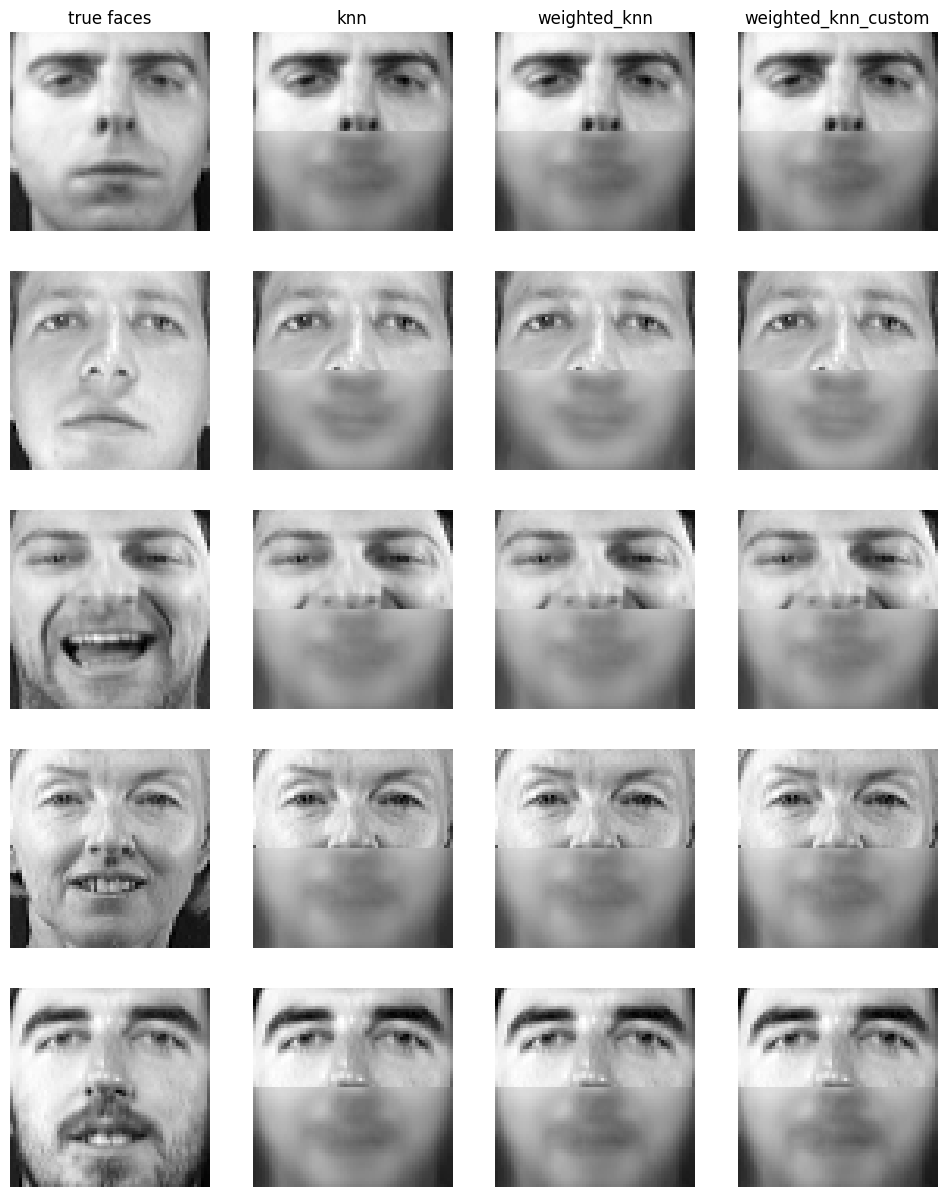

In [108]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )